### 6.2 Veri seti hazırlanmsı ve görsellestirme 

![ScreenS/6.1_RNN.PNG](ScreenS/6.1_RNN.PNG)
![ScreenS/6.1_RNN1.PNG](ScreenS/6.1_RNN1.PNG)

In [9]:
"""
rnn : tekrarlayan sinir agları : zaman serilerinde kullanyorduk: 
"""

'\nrnn : tekrarlayan sinir agları : zaman serilerinde kullanyorduk: \n'

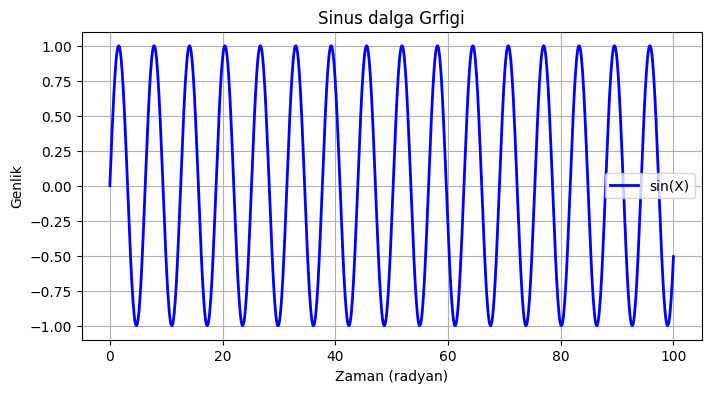

In [2]:
import torch 
import torch.nn as nn 
import numpy as np 
import matplotlib.pyplot as plt 

def generate_data (seq_length = 50, num_samples = 1000):
    X = np.linspace(0,100, num_samples) #0-100 arasi num_samples kadar veri olustur 
    y = np.sin(X)
    sequence = [] # giris dizilerini saklamak için 
    targets = [] # hedef degerleri saklamak için 

    for i in range(len(X) - seq_length):
        sequence.append(y[i:i+seq_length]) # input
        targets.append(y[i+seq_length]) # input dizisinden sonra gelen deger

    # veriyi görsellestir 
    plt.figure(figsize=(8,4))
    plt.plot(X,y, label = 'sin(X)', color='b', linewidth= 2)
    plt.title('Sinus dalga Grfigi')
    plt.xlabel('Zaman (radyan)')
    plt.ylabel('Genlik')
    plt.legend()
    plt.grid(True)
    plt.show()

    return np.array(sequence), np.array(targets) 
sequence, targets = generate_data()

In [6]:
print(sequence.shape)
print(targets.shape)

(950, 50)
(950,)


#### 6.3 Modelin Olusturulması 

In [7]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers = 1):
        super(RNN, self).__init__()
        """
        RNN -> Linear(output)

        input size = giris boyutu
        hidden_size = rnn gizli katman cell sayisi
        num_layers: rnn layer sayisi 
        """
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first= True) # Rnn Layer
        # output_size : cıkti boyutu
        self.fc = nn.Linear(hidden_size, output_size) 

    def forward(self, x):
        out, _ = self.rnn(x) # rnn e girdigyi ver ciktiyi al 
        out = self.fc(out[:,-1,:]) #son zaman adimindaki ciktiyi al ve fc layera bagla 
        return out
    
model = RNN(1,16,1,1)

#### 6.4 Modelin Egitilmesi

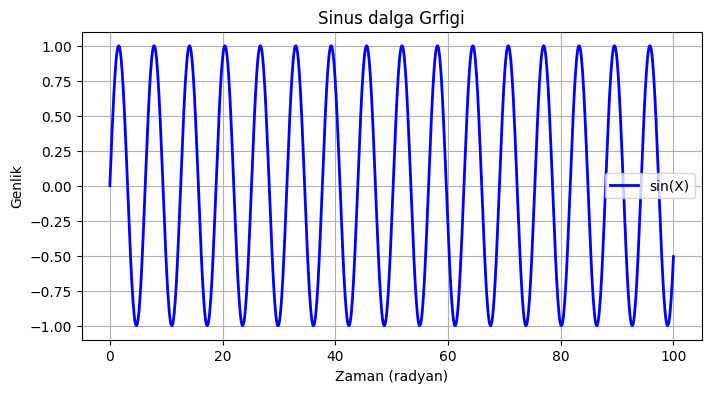

epoch 1/20,loss:0.3165
epoch 2/20,loss:0.0802
epoch 3/20,loss:0.0324
epoch 4/20,loss:0.0155
epoch 5/20,loss:0.0090
epoch 6/20,loss:0.0073
epoch 7/20,loss:0.0049
epoch 8/20,loss:0.0024
epoch 9/20,loss:0.0027
epoch 10/20,loss:0.0012
epoch 11/20,loss:0.0017
epoch 12/20,loss:0.0011
epoch 13/20,loss:0.0007
epoch 14/20,loss:0.0005
epoch 15/20,loss:0.0006
epoch 16/20,loss:0.0004
epoch 17/20,loss:0.0006
epoch 18/20,loss:0.0006
epoch 19/20,loss:0.0005
epoch 20/20,loss:0.0006


In [12]:
# hyperparameters
seq_length = 50
input_size = 1  # input dizisinin boyutu 
hidden_size = 16 # rnn in gizli katmandaki dugum sayisi 
output_size = 1  # output boyutu yada tahmi edilen deger 
num_layers = 1 # rnn katman sayisi
epochs = 20  
batch_size = 32 # her bir egitim adiminda kac ornegin kullanılcagı  
learning_rate = 0.001 # ogrenme hizi

# veriyi hazirla 
X, y = generate_data(seq_length)
X = torch.tensor(X,dtype = torch.float32).unsqueeze(-1) # pytorch tensorune cevir ve boyut ekle 
y = torch.tensor(y,dtype = torch.float32).unsqueeze(-1) # pytorch tensorune cevir ve boyut ekle

dataset = torch.utils.data.TensorDataset(X,y) #pytorch dataset olusturma
dataLoader = torch.utils.data.DataLoader(dataset, batch_size= batch_size, shuffle=True)

# modeli tanimla 
model = RNN(input_size, hidden_size, output_size, num_layers)
criterion = nn.MSELoss() # loss func :mse 
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

for epoch in range(epochs):
    for batch_x, batch_y in dataLoader:
        optimizer.zero_grad()
        pred_y = model(batch_x)
        loss = criterion(pred_y, batch_y)
        loss.backward() #geri yayilim ile gradyanlari hesapla 
        optimizer.step()
    print(f"epoch {epoch+1}/{epochs},loss:{loss.item():.4f}")


In [9]:
print(X.shape)
print(y.shape)

torch.Size([950, 50, 1])
torch.Size([950, 1])


#### 6.5 Modelin Test edilmesi

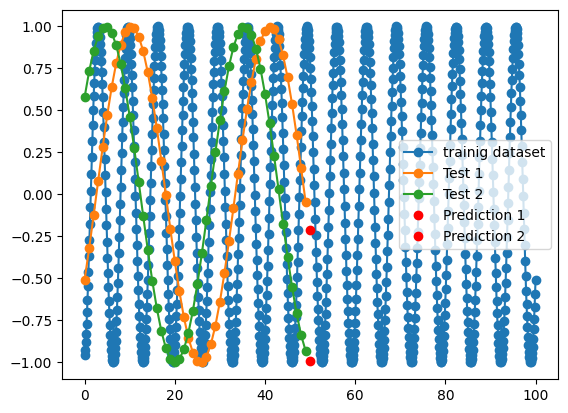

In [13]:
X_test = np.linspace(100, 110, seq_length).reshape(1,-1) # ilk test verisi 
y_test = np.sin(X_test) #test verimizin gercek degeri 

X_test2 = np.linspace(120, 130, seq_length).reshape(1,-1) # ilk test verisi 
y_test2 = np.sin(X_test2) #test verimizin gercek degeri 

# from numpy to tensor 
X_test  = torch.tensor(y_test, dtype = torch.float32).unsqueeze(-1)
X_test2 = torch.tensor(y_test2, dtype = torch.float32).unsqueeze(-1)

# modeli kullanrak pred yap 
model.eval()
pred1 = model(X_test ).detach().numpy() # ilk test verisi icin tahmin 
pred2 = model(X_test2).detach().numpy()  

#souclari görsellestir 
plt.figure()
plt.plot(np.linspace(0,100, len(y)), y, marker = 'o', label = "trainig dataset")
plt.plot( X_test.numpy().flatten(), marker = "o", label = "Test 1")
plt.plot(X_test2.numpy().flatten(), marker = "o", label = "Test 2")

plt.plot(np.arange(seq_length, seq_length + 1), pred1.flatten(), "ro", label="Prediction 1")
plt.plot(np.arange(seq_length, seq_length + 1), pred2.flatten(), "ro", label="Prediction 2")

plt.legend()
plt.show()